In [392]:
import matplotlib.pyplot as plt
import numpy as np


x = 1.22085284*10**-38 #hbar^2/m_e
y = 1.60218*10**-29 #eVÅ
z = 6.24150913 #10^-21J to meV
v = 1.60218*10**-22 #meV to J
mu= 9.274009994*10**-24 #mu_B

plt.rc('figure', figsize=[13,7]) #Diagramm size

def E1(k,m,a,g,b): #E-
    return x*k**2/(2*m)-np.sqrt((a*k)**2+(g*mu*b)**2)

def E2(k,m,a,g,b): #E+
    return x*k**2/(2*m)+np.sqrt((a*k)**2+(g*mu*b)**2)

def sdown1(k,m,a,g,b): #Probability measure spin down for E-
    if b==0:
        return 0.5
    B = g*mu*b 
    f = (B-np.sqrt((a*y*k)**2)+B**2)**2+(a*y*k)**2
    return (a*y*k)**2/f

def sup1(k,m,a,g,b): #Probability measure spin up for E-
    return 1-sdown1(k,m,a,g,b)

def sdown2(k,m,a,g,b): #Probability measure spin down for E+
    if b==0:
        return 0.5
    B = g*mu*b
    f = (B+np.sqrt((a*y*k)**2)+B**2)**2+(a*y*k)**2
    return (a*y*k)**2/f

def sup2(k,m,a,g,b): #Probability measure spin up for E-
    return 1-sdown2(k,m,a,g,b)

def I(s,e,n): #Intervall started at s ended at e with n steps
    x = (e-s)/(n-1)
    Y = []
    for n in range(n):
        Y.append(s+n*x)
    return Y

def PlotE(m,a,g,b,spin=0,s=-9*10**7,e=9*10**7,n=50): #Plot E- and E+
    if spin==0:
        X = np.linspace(s,e,2500)
        Y1 = E1(X,m,a*y,g,b)
        Y2 = E2(X,m,a*y,g,b)
        plt.plot(X*10**-7,Y1*10**21*z,c='k')
        plt.plot(X*10**-7,Y2*10**21*z,c='k')
        plt.plot(X*10**-7,Y1*10**21*z,c='b',alpha=0)
        plt.plot(X*10**-7,Y2*10**21*z,c='b',alpha=0)
        plt.xlabel('k [$10^7 \cdot m^{-1}$]')
        plt.ylabel('E [meV]')
        if type(b) == int:
            plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %d T'%b],loc="lower left",handlelength=0)
        else:
            plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %.1f T'%b],loc="lower left",handlelength=0)
        plt.show()
    else:
        A = I(s,e,n)
        for x in range(n-1):
            X = np.linspace(A[x],A[x+1],25)
            Y1 = E1(X,m,a*y,g,b)
            Y2 = E2(X,m,a*y,g,b)
            plt.plot(X*10**-7,Y1*10**21*z,linewidth=3,c=(1,0,0,sup1((A[x]+A[x+1])/2,m,a,g,b)))
            plt.plot(X*10**-7,Y1*10**21*z,linewidth=3,c=(0,0,1,sdown1((A[x]+A[x+1])/2,m,a,g,b)))
            plt.plot(X*10**-7,Y2*10**21*z,linewidth=3,c=(1,0,0,sup2((A[x]+A[x+1])/2,m,a,g,b)))
            plt.plot(X*10**-7,Y2*10**21*z,linewidth=3,c=(0,0,1,sdown2((A[x]+A[x+1])/2,m,a,g,b)))
        plt.xlabel('k [$10^7 \cdot m^{-1}$]')
        plt.ylabel('E [meV]')
        if type(b) == int:
            plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %d T'%b],loc="lower left",handlelength=0)
        else:
            plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %.1f T'%b],loc="lower left",handlelength=0)
        plt.show()
        
def PlotSpinE1(m,a,g,b,s=-9*10**7,e=9*10**7): # Plot Spin for E-
    X = np.linspace(s,e,500)
    Y1= sup1(X,m,a,g,b)
    Y2= sdown1(X,m,a,g,b)
    plt.plot(X*10**-7,Y1, 'r')
    plt.plot(X*10**-7,Y2, 'b')
    plt.plot(X*10**-7,Y1, 'r',alpha=0)
    plt.plot(X*10**-7,Y2, 'b',alpha=0)
    plt.xlabel('k [$10^7 \cdot m^{-1}$]')
    plt.ylabel('Probability')
    if type(b) == int:
        plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %d T'%b],loc="lower left",handlelength=0)
    else:
        plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %.1f T'%b],loc="lower left",handlelength=0)
    plt.text(-9.5, 1, 'Spin-up: red', {'color': 'r', 'fontsize': 10})
    plt.text(-9.5, .95, 'Spin-down: blue', {'color': 'b', 'fontsize': 10})
    plt.show()
    
def PlotSpinE2(m,a,g,b,s=-9*10**7,e=9*10**7): # Plot Spin for E+
    X = np.linspace(s,e,500)
    Y1= sup2(X,m,a,g,b)
    Y2= sdown2(X,m,a,g,b)
    plt.plot(X*10**-7,Y1, 'r')
    plt.plot(X*10**-7,Y2, 'b')
    plt.plot(X*10**-7,Y1, 'r',alpha=0)
    plt.plot(X*10**-7,Y2, 'b',alpha=0)
    plt.xlabel('k [$10^7 \cdot m^{-1}$]')
    plt.ylabel('Probability')
    if type(b) == int:
        plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %d T'%b],loc="lower left",handlelength=0)
    else:
        plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %.1f T'%b],lloc="lower left",handlelength=0)
    plt.text(-9.5, 1, 'Spin-up: red', {'color': 'r', 'fontsize': 10})
    plt.text(-9.5, .95, 'Spin-down: blue', {'color': 'b', 'fontsize': 10})
    plt.show()

def HBdG(k,m,a,g,b,d): # Bogoliubov-de Gennes Hamiltonian
    a= a*y
    H = [[x*k**2/(2*m)+g*mu*b,1j*a*k,d,0],
         [-1j*a*k,x*k**2/(2*m)-g*mu*b,0,d],
         [d,0,-x*k**2/(2*m)+g*mu*b,-1j*a*k],
         [0,d,1j*a*k,-x*k**2/(2*m)-g*mu*b]]
    return H

def PlotEBdG(m,a,g,b,d,s=-4*10**7,e=4*10**7,n=50): # Plot Energie of Bogoliubov-de Gennes Hamiltonian
    X = np.array(I(s,e,n))
    A = []
    B = []
    C = []
    D = []
    for k in range(n):
        Y = np.linalg.eig(HBdG(X[k],m,a,g,b,d*v))
        E = sorted([Y[0][0],Y[0][1],Y[0][2],Y[0][3]])
        A.append(E[0]*10**21*z)
        B.append(E[1]*10**21*z)
        C.append(E[2]*10**21*z)
        D.append(E[3]*10**21*z)
    plt.plot(X*10**-7,A,c='k')
    plt.plot(X*10**-7,B,c='k')
    plt.plot(X*10**-7,C,c='k')
    plt.plot(X*10**-7,D,c='k')
    plt.plot(X*10**-7,A,alpha=0)
    plt.xlabel('k [$10^7 \cdot m^{-1}$]')
    plt.ylabel('E [meV]')
    if type(b) == int:
        plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %d T'%b,'Δ    = %.1f meV'%d],loc="lower left",handlelength=0)
    else:
        plt.legend(['$m_*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%a,'g    = %d'%g,'B    = %.1f T'%b,'Δ    = %.1f meV'%d],loc="lower left",handlelength=0)
    plt.show()

# Energy-Wavenumber-Plot for InAs

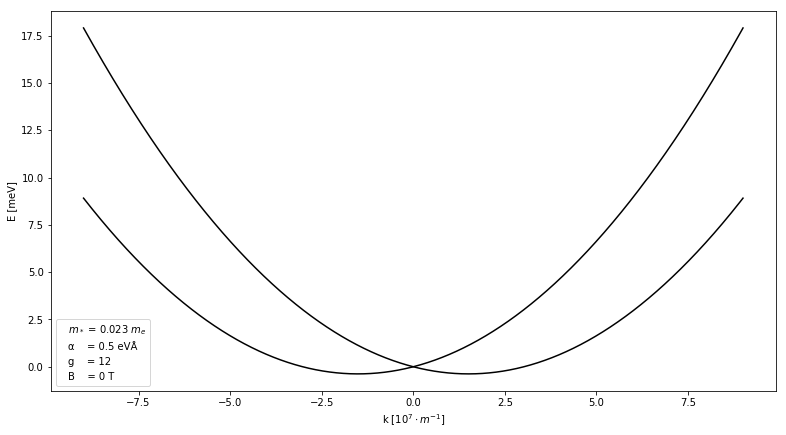

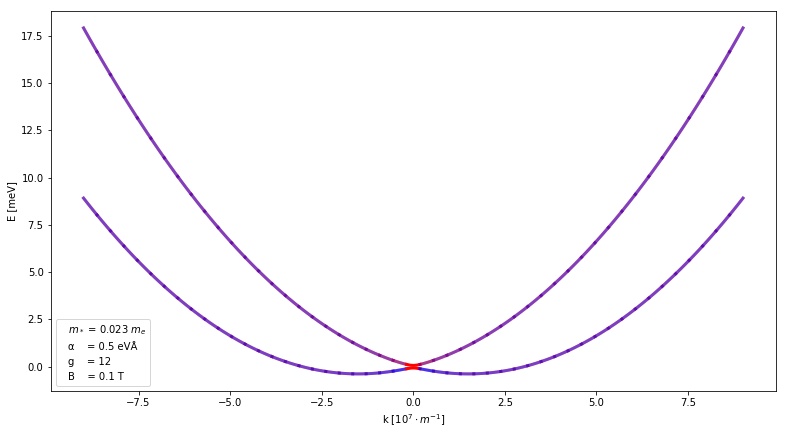

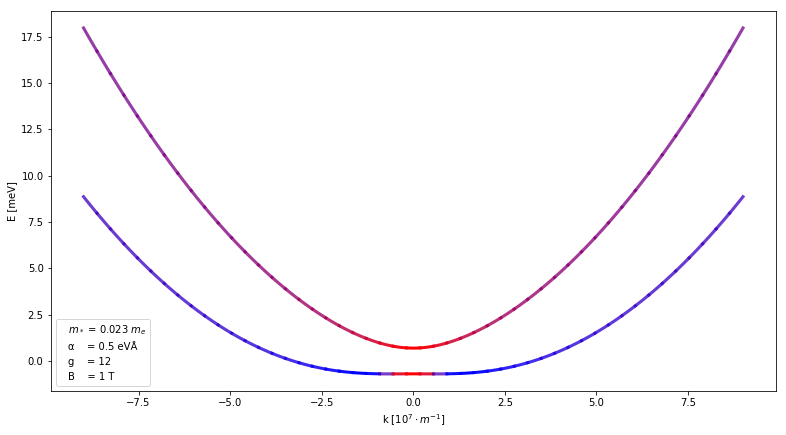

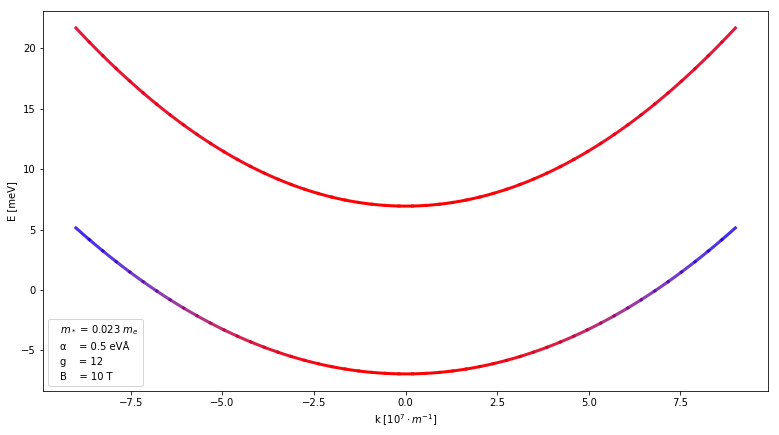

In [393]:
PlotE(0.023,0.5,12,0)
PlotE(0.023,0.5,12,0.1,1)
PlotE(0.023,0.5,12,1,1)
PlotE(0.023,0.5,12,10,1)

# Energy-Wavenumber-Plot for InSb

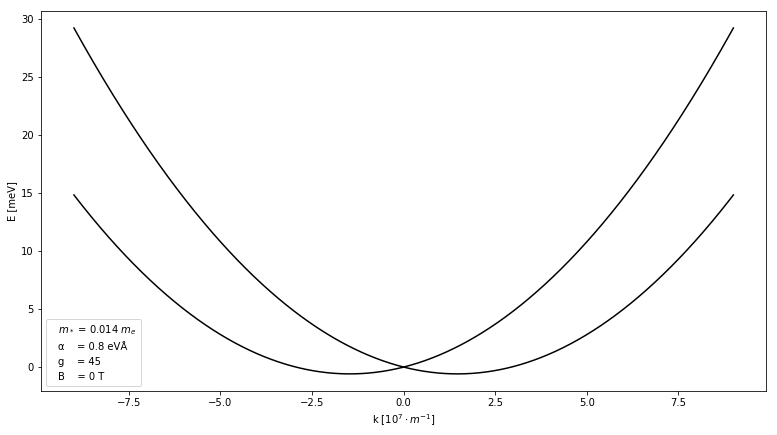

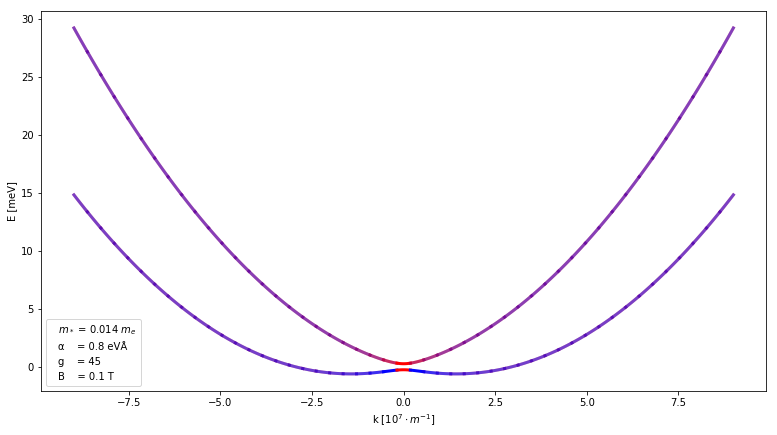

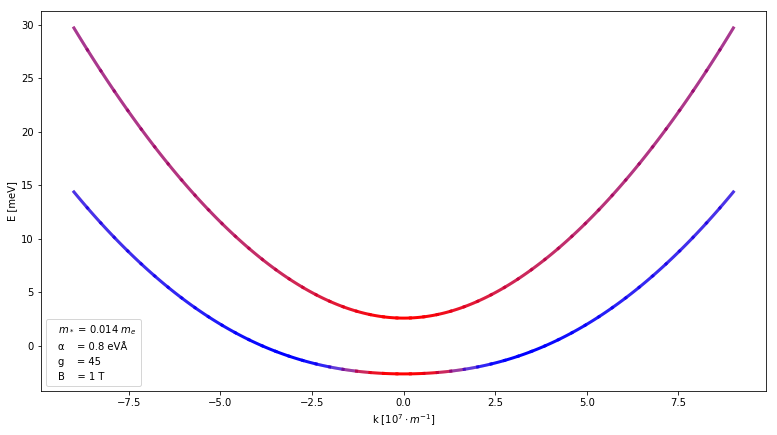

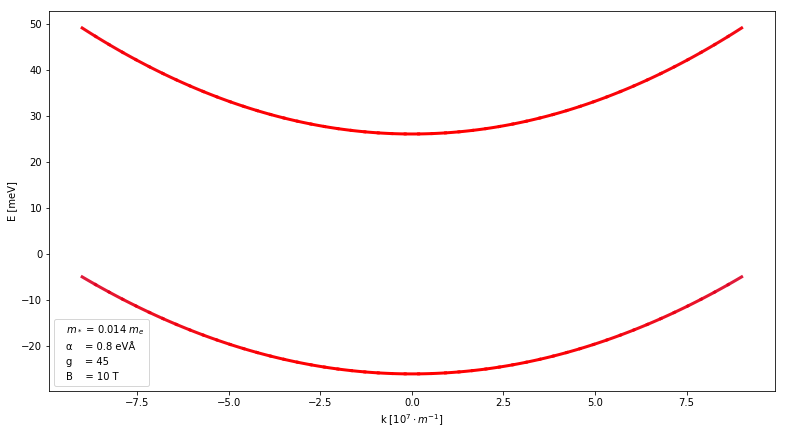

In [394]:
PlotE(0.014,0.8,45,0)
PlotE(0.014,0.8,45,0.1,1)
PlotE(0.014,0.8,45,1,1)
PlotE(0.014,0.8,45,10,1)

# Spinorientation of $E_-$

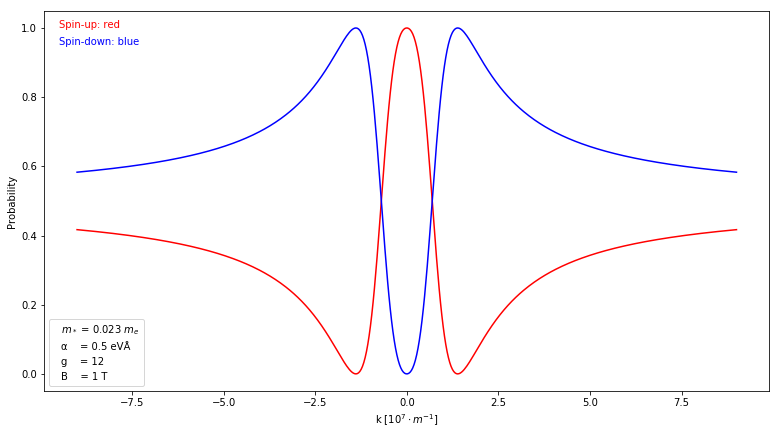

In [395]:
PlotSpinE1(0.023,0.5,12,1)

# Spinorientation of $E_+$

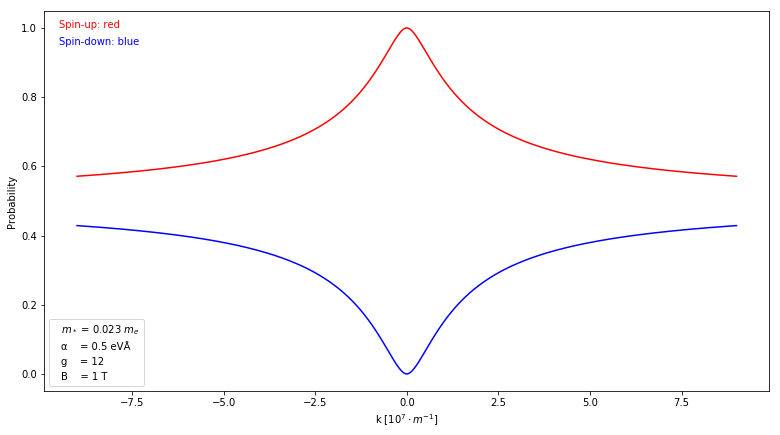

In [396]:
PlotSpinE2(0.023,0.5,12,1)

# Bogoliubov-de Gennes energy spectrum

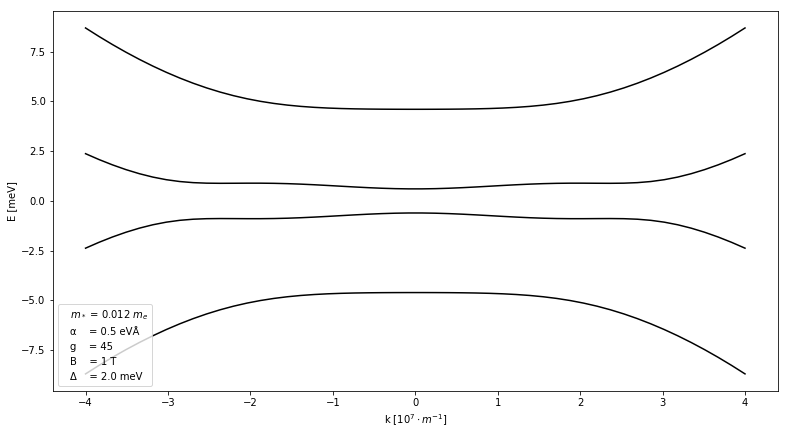

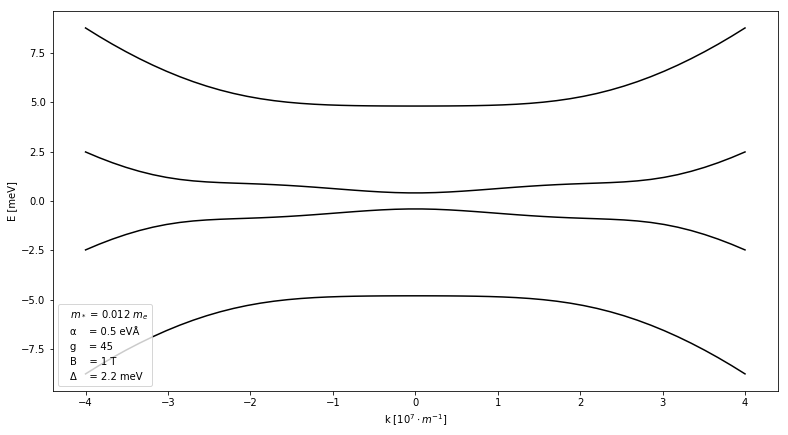

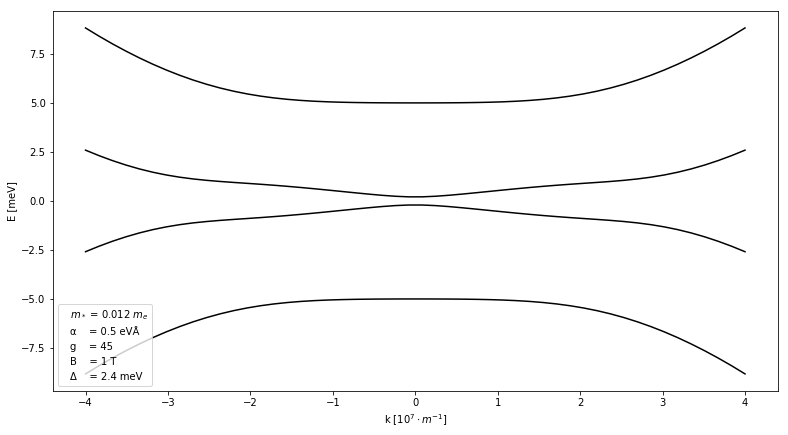

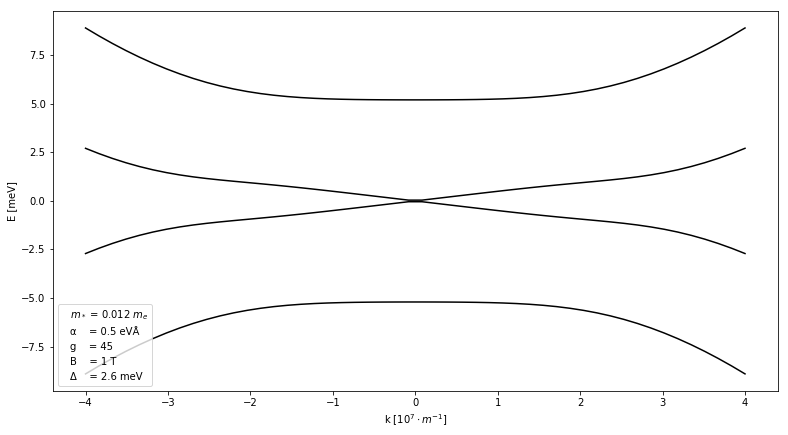

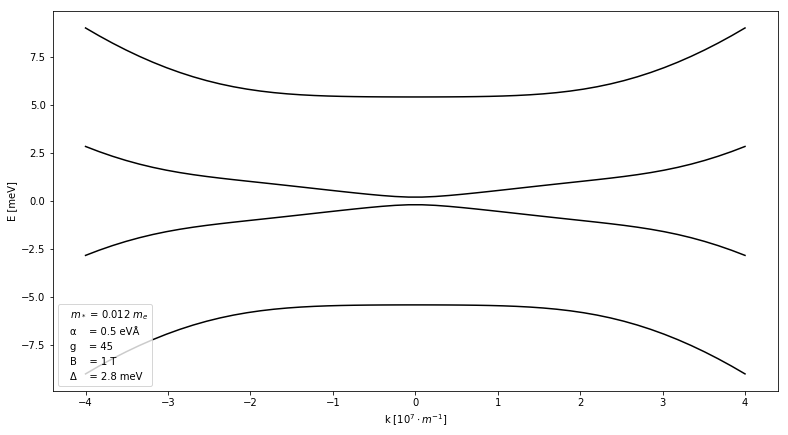

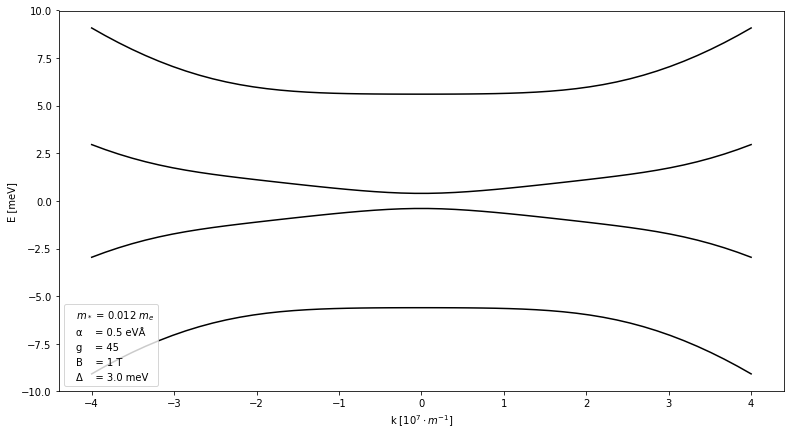

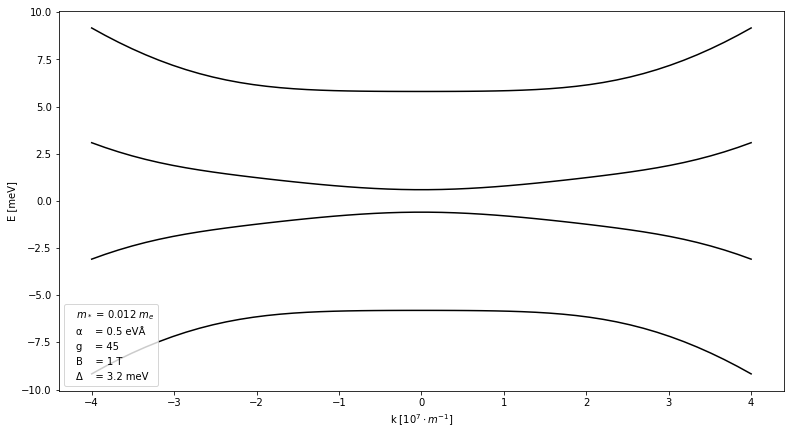

In [397]:
for w in range(7):
    PlotEBdG(0.012,0.5,45,1,2.0+0.2*w)